In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeClassifier, LogisticRegression

In [2]:
def get_data(n_train_samples=10000):
    # Retrieve MNIST dataset from Tensorflow Keras datasets
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    
    # Select 10000 random samples from x_train
    np.random.seed(1)
    indices = list(range(x_train.shape[0]))
    np.random.shuffle(indices)
    train_idx = indices[:n_train_samples]
    x_train = x_train[train_idx].reshape(n_train_samples, -1)
    y_train = y_train[train_idx]
    x_test = x_test.reshape(x_test.shape[0], -1)
    
    # Normalize data
    x_train.astype(np.float32)
    x_test.astype(np.float32)
    x_train = np.multiply(x_train, 1.0/255)
    x_test = np.multiply(x_test, 1.0/255)
    
    return x_train, y_train, x_test, y_test

In [3]:
def generate_synthetic_data(X, r1, r2):

    o = np.dot(X, r1) ** 2 + np.dot(X, r2) ** 2  # real and complex part
    return o

In [4]:
def generate_kernelized_synthetic_data(X, r1, r2, rff_dim):
    # Perform the operation to generate synthetic data
    sigma=0.005
    N, D = X.shape
    W = np.random.laplace(loc=0, scale=1, size=(rff_dim, D))
    b = np.random.uniform(0, 2*np.pi, size=rff_dim)
    B = np.repeat(b[:, np.newaxis], N, axis=1)
    Z = 1 / np.sqrt(rff_dim) * np.sqrt(2) * np.cos(sigma * W @ X.T + B)
    Z = Z.T
#     o = np.dot(Z, r1) ** 2 + np.dot(Z, r2) ** 2  # real and complex part
    return Z

In [5]:
def fit_ridge_classifier(x_train, y_train, x_test, y_test, alpha=0.001):
    # Fit a Ridge Classifier
    clf = RidgeClassifier(alpha=alpha)
    clf.fit(x_train, y_train.ravel())
    
    # Evaluate prediction accuracy on training and test data
    train_accuracy = clf.score(x_train, y_train)
    test_accuracy = clf.score(x_test, y_test)
    return train_accuracy, test_accuracy

In [6]:
def fitLogisticRegression(x_train, y_train, x_test, y_test):
    clf = LogisticRegression(random_state=0, max_iter=1000)
    clf.fit(x_train, y_train.ravel())
    
    # Evaluate prediction accuracy on training and test data
    train_accuracy = clf.score(x_train, y_train)
    test_accuracy = clf.score(x_test, y_test)
    return train_accuracy, test_accuracy

In [7]:
def fitKernelRidgeClassifier(x_train, y_train, x_test, y_test, alpha=0.001):
    # Fit a Ridge Classifier
    clf = KernelRidgeRegression(alpha=alpha)
    clf.fit(x_train, y_train.ravel())
    
    # Evaluate prediction accuracy on training and test data
    train_accuracy = clf.score(x_train, y_train)
    test_accuracy = clf.score(x_test, y_test)
    return train_accuracy, test_accuracy

In [8]:
# Get Data

x_train, y_train, x_test, y_test = get_data()

11501568/11490434 [==============================] - 0s 0us/step


In [9]:
# Run experiments

train_acc_list = []
test_acc_list = []

feature_size_list = sorted([1000 * k for k in range(1, 16)] + [250, 500, 1500, 2500, 9500, 10500, 17500, 20000, 22500, 25000, 27500, 30000])
for num_feature in feature_size_list:
    dim = 28 * 28
    R1 = np.random.randn(dim, num_feature) / np.sqrt(num_feature)
    R2 = np.random.randn(dim, num_feature) / np.sqrt(num_feature)
    x_train_synthetic = generate_synthetic_data(x_train, R1, R2)
    x_test_synthetic = generate_synthetic_data(x_test, R1, R2)
    
    train_accuracy, test_accuracy = fit_ridge_classifier(x_train_synthetic, y_train, x_test_synthetic, y_test)
    train_acc_list.append(train_accuracy)
    test_acc_list.append(test_accuracy)
    print ("Number of features: %d. Training accuracy: %.3f. Test accuracy: %.3f" % (num_feature, train_accuracy, test_accuracy))

Number of features: 250. Training accuracy: 0.894. Test accuracy: 0.883
Number of features: 500. Training accuracy: 0.935. Test accuracy: 0.917
Number of features: 1000. Training accuracy: 0.966. Test accuracy: 0.937
Number of features: 1500. Training accuracy: 0.978. Test accuracy: 0.948
Number of features: 2000. Training accuracy: 0.986. Test accuracy: 0.950
Number of features: 2500. Training accuracy: 0.992. Test accuracy: 0.949
Number of features: 3000. Training accuracy: 0.995. Test accuracy: 0.950
Number of features: 4000. Training accuracy: 0.998. Test accuracy: 0.942
Number of features: 5000. Training accuracy: 1.000. Test accuracy: 0.934
Number of features: 6000. Training accuracy: 1.000. Test accuracy: 0.923
Number of features: 7000. Training accuracy: 1.000. Test accuracy: 0.898
Number of features: 8000. Training accuracy: 1.000. Test accuracy: 0.868
Number of features: 9000. Training accuracy: 1.000. Test accuracy: 0.848
Number of features: 9500. Training accuracy: 1.000. T

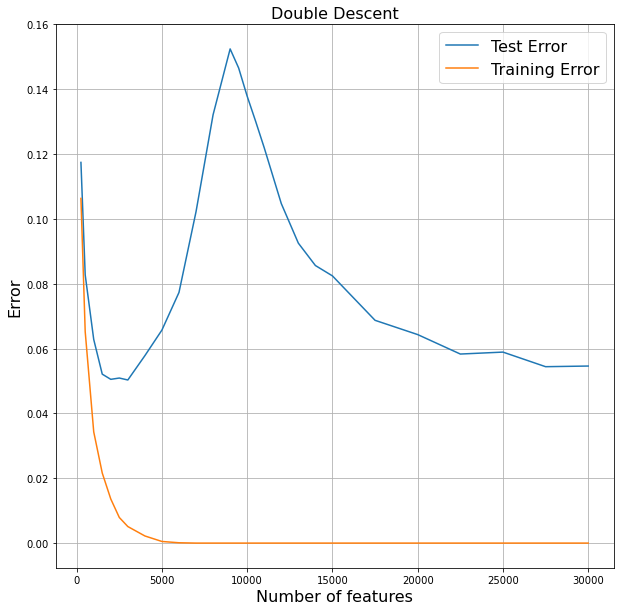

In [10]:
# Plot Train and Test Error

plt.figure(figsize=(10, 10))
plt.plot(feature_size_list, 1-np.array(test_acc_list), label = "Test Error")
plt.plot(feature_size_list, 1-np.array(train_acc_list), label = "Training Error")
plt.xlabel('Number of features', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.title('Double Descent', fontsize=16)
plt.grid()
plt.legend(fontsize='16')
plt.show()

In [11]:
# Run experiments

train_acc_list = []
test_acc_list = []

feature_size_list = sorted([1000 * k for k in range(1, 16)] + [250, 500, 1500, 2500, 9500, 10500, 17500, 20000, 22500, 25000, 27500, 30000])
for num_feature in feature_size_list:
    dim = 28 * 28
    R1 = np.random.randn(dim, num_feature) / np.sqrt(num_feature)
    R2 = np.random.randn(dim, num_feature) / np.sqrt(num_feature)
    x_train_synthetic = generate_synthetic_data(x_train, R1, R2)
    x_test_synthetic = generate_synthetic_data(x_test, R1, R2)
    
    train_accuracy, test_accuracy = fitLogisticRegression(x_train_synthetic, y_train, x_test_synthetic, y_test)
    train_acc_list.append(train_accuracy)
    test_acc_list.append(test_accuracy)
    print ("Number of features: %d. Training accuracy: %.3f. Test accuracy: %.3f" % (num_feature, train_accuracy, test_accuracy))

Number of features: 250. Training accuracy: 0.970. Test accuracy: 0.898
Number of features: 500. Training accuracy: 0.997. Test accuracy: 0.934
Number of features: 1000. Training accuracy: 0.997. Test accuracy: 0.952
Number of features: 1500. Training accuracy: 0.996. Test accuracy: 0.953
Number of features: 2000. Training accuracy: 0.994. Test accuracy: 0.956
Number of features: 2500. Training accuracy: 0.992. Test accuracy: 0.955
Number of features: 3000. Training accuracy: 0.991. Test accuracy: 0.958
Number of features: 4000. Training accuracy: 0.988. Test accuracy: 0.956
Number of features: 5000. Training accuracy: 0.985. Test accuracy: 0.957
Number of features: 6000. Training accuracy: 0.983. Test accuracy: 0.954
Number of features: 7000. Training accuracy: 0.981. Test accuracy: 0.955
Number of features: 8000. Training accuracy: 0.979. Test accuracy: 0.953
Number of features: 9000. Training accuracy: 0.978. Test accuracy: 0.951
Number of features: 9500. Training accuracy: 0.976. T

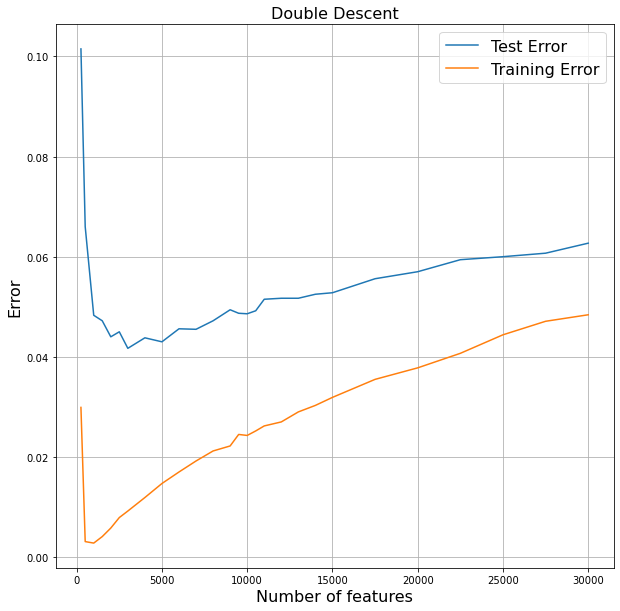

In [12]:
# Plot Train and Test Error

plt.figure(figsize=(10, 10))
plt.plot(feature_size_list, 1-np.array(test_acc_list), label = "Test Error")
plt.plot(feature_size_list, 1-np.array(train_acc_list), label = "Training Error")
plt.xlabel('Number of features', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.title('Double Descent', fontsize=16)
plt.grid()
plt.legend(fontsize='16')
plt.show()

In [13]:
# Run experiments

train_acc_list = []
test_acc_list = []

feature_size_list = sorted([1000 * k for k in range(1, 16)] + [250, 500, 1500, 2500, 9500, 10500, 17500, 20000, 22500, 25000, 27500, 30000])
for num_feature in feature_size_list:
    dim = 28 * 28
    R1 = np.random.randn(dim, num_feature) / np.sqrt(num_feature)
    R2 = np.random.randn(dim, num_feature) / np.sqrt(num_feature)
    x_train_synthetic = generate_kernelized_synthetic_data(x_train, R1, R2, num_feature)
    x_test_synthetic = generate_kernelized_synthetic_data(x_test, R1, R2, num_feature)
    train_accuracy, test_accuracy = fit_ridge_classifier(x_train_synthetic, y_train, x_test_synthetic, y_test)
    train_acc_list.append(train_accuracy)
    test_acc_list.append(test_accuracy)
    print ("Number of features: %d. Training accuracy: %.3f. Test accuracy: %.3f" % (num_feature, train_accuracy, test_accuracy))

Number of features: 250. Training accuracy: 0.867. Test accuracy: 0.103
Number of features: 500. Training accuracy: 0.880. Test accuracy: 0.114
Number of features: 1000. Training accuracy: 0.886. Test accuracy: 0.114
Number of features: 1500. Training accuracy: 0.889. Test accuracy: 0.114
Number of features: 2000. Training accuracy: 0.890. Test accuracy: 0.114
Number of features: 2500. Training accuracy: 0.891. Test accuracy: 0.114
Number of features: 3000. Training accuracy: 0.892. Test accuracy: 0.114
Number of features: 4000. Training accuracy: 0.891. Test accuracy: 0.114
Number of features: 5000. Training accuracy: 0.893. Test accuracy: 0.114
Number of features: 6000. Training accuracy: 0.892. Test accuracy: 0.114
Number of features: 7000. Training accuracy: 0.895. Test accuracy: 0.114
Number of features: 8000. Training accuracy: 0.893. Test accuracy: 0.114
Number of features: 9000. Training accuracy: 0.894. Test accuracy: 0.114
Number of features: 9500. Training accuracy: 0.893. T

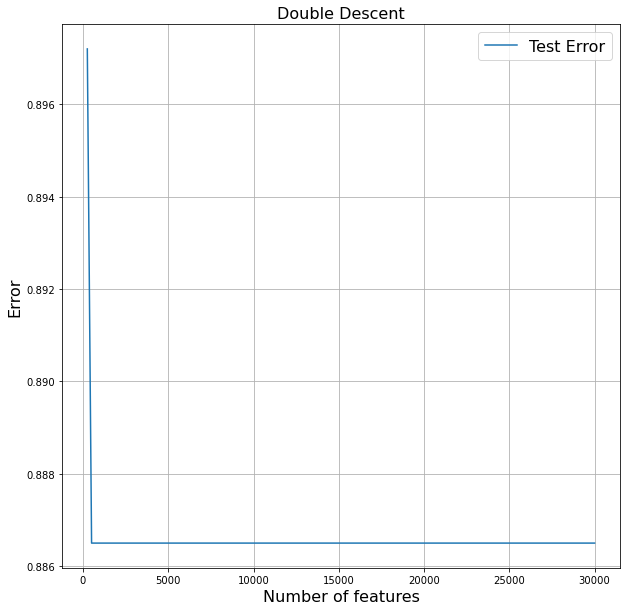

In [14]:
# Plot Train and Test Error

plt.figure(figsize=(10, 10))
plt.plot(feature_size_list, 1-np.array(test_acc_list), label = "Test Error")
# plt.plot(feature_size_list, 1-np.array(train_acc_list), label = "Training Error")
plt.xlabel('Number of features', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.title('Double Descent', fontsize=16)
plt.grid()
plt.legend(fontsize='16')
plt.show()

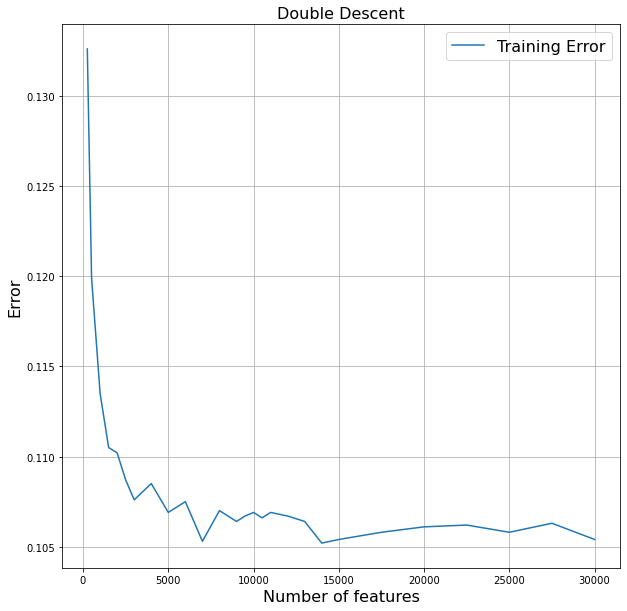

In [15]:
# Plot Train and Test Error

plt.figure(figsize=(10, 10))
# plt.plot(feature_size_list, 1-np.array(test_acc_list), label = "Test Error")
plt.plot(feature_size_list, 1-np.array(train_acc_list), label = "Training Error")
plt.xlabel('Number of features', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.title('Double Descent', fontsize=16)
plt.grid()
plt.legend(fontsize='16')
plt.show()